There are 3 types of recomender system
1. Content Based Recomender System
2. Collaberative Filtering Recomender System
3. Hybrid

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import ast

In [2]:
data1 = pd.read_csv("tmdb_5000_movies.csv") 

In [3]:
data2 = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
data1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
data2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
data = data1.merge(data2, on='title')

In [7]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

<Axes: xlabel='original_language', ylabel='count'>

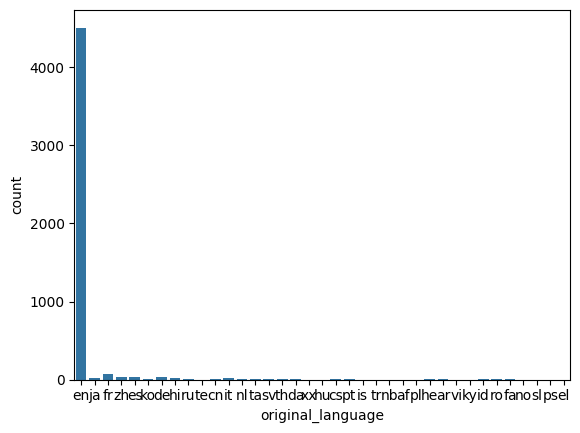

In [9]:
sns.countplot(x='original_language', data=data)

In [10]:
data.drop(['budget', 'homepage', 'original_language', 'production_companies', 'movie_id','production_countries', 'tagline', 'original_title', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'vote_average'], axis=1, inplace=True)

In [11]:
data.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


<Axes: >

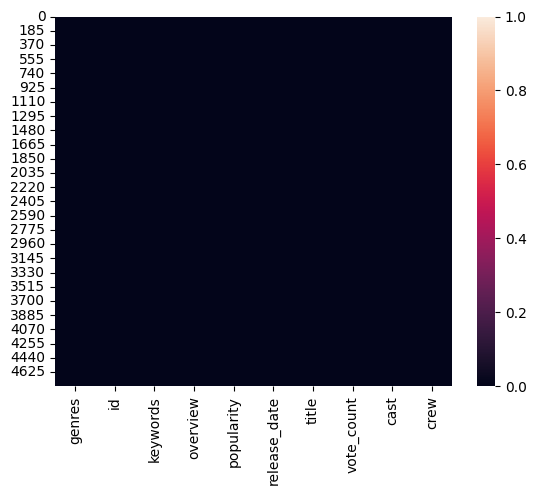

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.dropna(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [16]:
def convert(lists):
    l = []
    for i in ast.literal_eval(lists):
        l.append(i["name"])
    return l

In [17]:
convert('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
)

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [18]:
data['genres'] = data['genres'].apply(convert)

In [19]:
data.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
data['keywords'] = data['keywords'].apply(convert)

In [21]:
data.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [22]:
def cast(obj):
    l = []
    i = 0
    for n in ast.literal_eval(obj):
        if i < 3:
            l.append(n['name'])
            i = i + 1
        else:
            break
    return l

In [23]:
cast('[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 2, "id": 59231, "name": "Joel David Moore", "order": 6}, {"cast_id": 9, "character": "Moat", "credit_id": "52fe48009251416c750ac9e5", "gender": 1, "id": 30485, "name": "CCH Pounder", "order": 7}, {"cast_id": 11, "character": "Eytukan", "credit_id": "52fe48009251416c750ac9ed", "gender": 2, "id": 15853, "name": "Wes Studi", "order": 8}, {"cast_id": 10, "character": "Tsu\'Tey", "credit_id": "52fe48009251416c750ac9e9", "gender": 2, "id": 10964, "name": "Laz Alonso", "order": 9}, {"cast_id": 12, "character": "Dr. Max Patel", "credit_id": "52fe48009251416c750ac9f1", "gender": 2, "id": 95697, "name": "Dileep Rao", "order": 10}, {"cast_id": 13, "character": "Lyle Wainfleet", "credit_id": "52fe48009251416c750ac9f5", "gender": 2, "id": 98215, "name": "Matt Gerald", "order": 11}, {"cast_id": 32, "character": "Private Fike", "credit_id": "52fe48009251416c750aca5b", "gender": 2, "id": 154153, "name": "Sean Anthony Moran", "order": 12}, {"cast_id": 33, "character": "Cryo Vault Med Tech", "credit_id": "52fe48009251416c750aca5f", "gender": 2, "id": 397312, "name": "Jason Whyte", "order": 13}, {"cast_id": 34, "character": "Venture Star Crew Chief", "credit_id": "52fe48009251416c750aca63", "gender": 2, "id": 42317, "name": "Scott Lawrence", "order": 14}, {"cast_id": 35, "character": "Lock Up Trooper", "credit_id": "52fe48009251416c750aca67", "gender": 2, "id": 986734, "name": "Kelly Kilgour", "order": 15}, {"cast_id": 36, "character": "Shuttle Pilot", "credit_id": "52fe48009251416c750aca6b", "gender": 0, "id": 1207227, "name": "James Patrick Pitt", "order": 16}, {"cast_id": 37, "character": "Shuttle Co-Pilot", "credit_id": "52fe48009251416c750aca6f", "gender": 0, "id": 1180936, "name": "Sean Patrick Murphy", "order": 17}, {"cast_id": 38, "character": "Shuttle Crew Chief", "credit_id": "52fe48009251416c750aca73", "gender": 2, "id": 1019578, "name": "Peter Dillon", "order": 18}, {"cast_id": 39, "character": "Tractor Operator / Troupe", "credit_id": "52fe48009251416c750aca77", "gender": 0, "id": 91443, "name": "Kevin Dorman", "order": 19}, {"cast_id": 40, "character": "Dragon Gunship Pilot", "credit_id": "52fe48009251416c750aca7b", "gender": 2, "id": 173391, "name": "Kelson Henderson", "order": 20}, {"cast_id": 41, "character": "Dragon Gunship Gunner", "credit_id": "52fe48009251416c750aca7f", "gender": 0, "id": 1207236, "name": "David Van Horn", "order": 21}, {"cast_id": 42, "character": "Dragon Gunship Navigator", "credit_id": "52fe48009251416c750aca83", "gender": 0, "id": 215913, "name": "Jacob Tomuri", "order": 22}, {"cast_id": 43, "character": "Suit #1", "credit_id": "52fe48009251416c750aca87", "gender": 0, "id": 143206, "name": "Michael Blain-Rozgay", "order": 23}, {"cast_id": 44, "character": "Suit #2", "credit_id": "52fe48009251416c750aca8b", "gender": 2, "id": 169676, "name": "Jon Curry", "order": 24}, {"cast_id": 46, "character": "Ambient Room Tech", "credit_id": "52fe48009251416c750aca8f", "gender": 0, "id": 1048610, "name": "Luke Hawker", "order": 25}, {"cast_id": 47, "character": "Ambient Room Tech / Troupe", "credit_id": "52fe48009251416c750aca93", "gender": 0, "id": 42288, "name": "Woody Schultz", "order": 26}, {"cast_id": 48, "character": "Horse Clan Leader", "credit_id": "52fe48009251416c750aca97", "gender": 2, "id": 68278, "name": "Peter Mensah", "order": 27}, {"cast_id": 49, "character": "Link Room Tech", "credit_id": "52fe48009251416c750aca9b", "gender": 0, "id": 1207247, "name": "Sonia Yee", "order": 28}, {"cast_id": 50, "character": "Basketball Avatar / Troupe", "credit_id": "52fe48009251416c750aca9f", "gender": 1, "id": 1207248, "name": "Jahnel Curfman", "order": 29}, {"cast_id": 51, "character": "Basketball Avatar", "credit_id": "52fe48009251416c750acaa3", "gender": 0, "id": 89714, "name": "Ilram Choi", "order": 30}, {"cast_id": 52, "character": "Na\'vi Child", "credit_id": "52fe48009251416c750acaa7", "gender": 0, "id": 1207249, "name": "Kyla Warren", "order": 31}, {"cast_id": 53, "character": "Troupe", "credit_id": "52fe48009251416c750acaab", "gender": 0, "id": 1207250, "name": "Lisa Roumain", "order": 32}, {"cast_id": 54, "character": "Troupe", "credit_id": "52fe48009251416c750acaaf", "gender": 1, "id": 83105, "name": "Debra Wilson", "order": 33}, {"cast_id": 57, "character": "Troupe", "credit_id": "52fe48009251416c750acabb", "gender": 0, "id": 1207253, "name": "Chris Mala", "order": 34}, {"cast_id": 55, "character": "Troupe", "credit_id": "52fe48009251416c750acab3", "gender": 0, "id": 1207251, "name": "Taylor Kibby", "order": 35}, {"cast_id": 56, "character": "Troupe", "credit_id": "52fe48009251416c750acab7", "gender": 0, "id": 1207252, "name": "Jodie Landau", "order": 36}, {"cast_id": 58, "character": "Troupe", "credit_id": "52fe48009251416c750acabf", "gender": 0, "id": 1207254, "name": "Julie Lamm", "order": 37}, {"cast_id": 59, "character": "Troupe", "credit_id": "52fe48009251416c750acac3", "gender": 0, "id": 1207257, "name": "Cullen B. Madden", "order": 38}, {"cast_id": 60, "character": "Troupe", "credit_id": "52fe48009251416c750acac7", "gender": 0, "id": 1207259, "name": "Joseph Brady Madden", "order": 39}, {"cast_id": 61, "character": "Troupe", "credit_id": "52fe48009251416c750acacb", "gender": 0, "id": 1207262, "name": "Frankie Torres", "order": 40}, {"cast_id": 62, "character": "Troupe", "credit_id": "52fe48009251416c750acacf", "gender": 1, "id": 1158600, "name": "Austin Wilson", "order": 41}, {"cast_id": 63, "character": "Troupe", "credit_id": "52fe48019251416c750acad3", "gender": 1, "id": 983705, "name": "Sara Wilson", "order": 42}, {"cast_id": 64, "character": "Troupe", "credit_id": "52fe48019251416c750acad7", "gender": 0, "id": 1207263, "name": "Tamica Washington-Miller", "order": 43}, {"cast_id": 65, "character": "Op Center Staff", "credit_id": "52fe48019251416c750acadb", "gender": 1, "id": 1145098, "name": "Lucy Briant", "order": 44}, {"cast_id": 66, "character": "Op Center Staff", "credit_id": "52fe48019251416c750acadf", "gender": 2, "id": 33305, "name": "Nathan Meister", "order": 45}, {"cast_id": 67, "character": "Op Center Staff", "credit_id": "52fe48019251416c750acae3", "gender": 0, "id": 1207264, "name": "Gerry Blair", "order": 46}, {"cast_id": 68, "character": "Op Center Staff", "credit_id": "52fe48019251416c750acae7", "gender": 2, "id": 33311, "name": "Matthew Chamberlain", "order": 47}, {"cast_id": 69, "character": "Op Center Staff", "credit_id": "52fe48019251416c750acaeb", "gender": 0, "id": 1207265, "name": "Paul Yates", "order": 48}, {"cast_id": 70, "character": "Op Center Duty Officer", "credit_id": "52fe48019251416c750acaef", "gender": 0, "id": 1207266, "name": "Wray Wilson", "order": 49}, {"cast_id": 71, "character": "Op Center Staff", "credit_id": "52fe48019251416c750acaf3", "gender": 2, "id": 54492, "name": "James Gaylyn", "order": 50}, {"cast_id": 72, "character": "Dancer", "credit_id": "52fe48019251416c750acaf7", "gender": 0, "id": 1207267, "name": "Melvin Leno Clark III", "order": 51}, {"cast_id": 73, "character": "Dancer", "credit_id": "52fe48019251416c750acafb", "gender": 0, "id": 1207268, "name": "Carvon Futrell", "order": 52}, {"cast_id": 74, "character": "Dancer", "credit_id": "52fe48019251416c750acaff", "gender": 0, "id": 1207269, "name": "Brandon Jelkes", "order": 53}, {"cast_id": 75, "character": "Dancer", "credit_id": "52fe48019251416c750acb03", "gender": 0, "id": 1207270, "name": "Micah Moch", "order": 54}, {"cast_id": 76, "character": "Dancer", "credit_id": "52fe48019251416c750acb07", "gender": 0, "id": 1207271, "name": "Hanniyah Muhammad", "order": 55}, {"cast_id": 77, "character": "Dancer", "credit_id": "52fe48019251416c750acb0b", "gender": 0, "id": 1207272, "name": "Christopher Nolen", "order": 56}, {"cast_id": 78, "character": "Dancer", "credit_id": "52fe48019251416c750acb0f", "gender": 0, "id": 1207273, "name": "Christa Oliver", "order": 57}, {"cast_id": 79, "character": "Dancer", "credit_id": "52fe48019251416c750acb13", "gender": 0, "id": 1207274, "name": "April Marie Thomas", "order": 58}, {"cast_id": 80, "character": "Dancer", "credit_id": "52fe48019251416c750acb17", "gender": 0, "id": 1207275, "name": "Bravita A. Threatt", "order": 59}, {"cast_id": 81, "character": "Mining Chief (uncredited)", "credit_id": "52fe48019251416c750acb1b", "gender": 0, "id": 1207276, "name": "Colin Bleasdale", "order": 60}, {"cast_id": 82, "character": "Veteran Miner (uncredited)", "credit_id": "52fe48019251416c750acb1f", "gender": 0, "id": 107969, "name": "Mike Bodnar", "order": 61}, {"cast_id": 83, "character": "Richard (uncredited)", "credit_id": "52fe48019251416c750acb23", "gender": 0, "id": 1207278, "name": "Matt Clayton", "order": 62}, {"cast_id": 84, "character": "Nav\'i (uncredited)", "credit_id": "52fe48019251416c750acb27", "gender": 1, "id": 147898, "name": "Nicole Dionne", "order": 63}, {"cast_id": 85, "character": "Trooper (uncredited)", "credit_id": "52fe48019251416c750acb2b", "gender": 0, "id": 1207280, "name": "Jamie Harrison", "order": 64}, {"cast_id": 86, "character": "Trooper (uncredited)", "credit_id": "52fe48019251416c750acb2f", "gender": 0, "id": 1207281, "name": "Allan Henry", "order": 65}, {"cast_id": 87, "character": "Ground Technician (uncredited)", "credit_id": "52fe48019251416c750acb33", "gender": 2, "id": 1207282, "name": "Anthony Ingruber", "order": 66}, {"cast_id": 88, "character": "Flight Crew Mechanic (uncredited)", "credit_id": "52fe48019251416c750acb37", "gender": 0, "id": 1207283, "name": "Ashley Jeffery", "order": 67}, {"cast_id": 14, "character": "Samson Pilot", "credit_id": "52fe48009251416c750ac9f9", "gender": 0, "id": 98216, "name": "Dean Knowsley", "order": 68}, {"cast_id": 89, "character": "Trooper (uncredited)", "credit_id": "52fe48019251416c750acb3b", "gender": 0, "id": 1201399, "name": "Joseph Mika-Hunt", "order": 69}, {"cast_id": 90, "character": "Banshee (uncredited)", "credit_id": "52fe48019251416c750acb3f", "gender": 0, "id": 236696, "name": "Terry Notary", "order": 70}, {"cast_id": 91, "character": "Soldier (uncredited)", "credit_id": "52fe48019251416c750acb43", "gender": 0, "id": 1207287, "name": "Kai Pantano", "order": 71}, {"cast_id": 92, "character": "Blast Technician (uncredited)", "credit_id": "52fe48019251416c750acb47", "gender": 0, "id": 1207288, "name": "Logan Pithyou", "order": 72}, {"cast_id": 93, "character": "Vindum Raah (uncredited)", "credit_id": "52fe48019251416c750acb4b", "gender": 0, "id": 1207289, "name": "Stuart Pollock", "order": 73}, {"cast_id": 94, "character": "Hero (uncredited)", "credit_id": "52fe48019251416c750acb4f", "gender": 0, "id": 584868, "name": "Raja", "order": 74}, {"cast_id": 95, "character": "Ops Centreworker (uncredited)", "credit_id": "52fe48019251416c750acb53", "gender": 0, "id": 1207290, "name": "Gareth Ruck", "order": 75}, {"cast_id": 96, "character": "Engineer (uncredited)", "credit_id": "52fe48019251416c750acb57", "gender": 0, "id": 1062463, "name": "Rhian Sheehan", "order": 76}, {"cast_id": 97, "character": "Col. Quaritch\'s Mech Suit (uncredited)", "credit_id": "52fe48019251416c750acb5b", "gender": 0, "id": 60656, "name": "T. J. Storm", "order": 77}, {"cast_id": 98, "character": "Female Marine (uncredited)", "credit_id": "52fe48019251416c750acb5f", "gender": 0, "id": 1207291, "name": "Jodie Taylor", "order": 78}, {"cast_id": 99, "character": "Ikran Clan Leader (uncredited)", "credit_id": "52fe48019251416c750acb63", "gender": 1, "id": 1186027, "name": "Alicia Vela-Bailey", "order": 79}, {"cast_id": 100, "character": "Geologist (uncredited)", "credit_id": "52fe48019251416c750acb67", "gender": 0, "id": 1207292, "name": "Richard Whiteside", "order": 80}, {"cast_id": 101, "character": "Na\'vi (uncredited)", "credit_id": "52fe48019251416c750acb6b", "gender": 0, "id": 103259, "name": "Nikie Zambo", "order": 81}, {"cast_id": 102, "character": "Ambient Room Tech / Troupe", "credit_id": "52fe48019251416c750acb6f", "gender": 1, "id": 42286, "name": "Julene Renee", "order": 82}]')

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [24]:
data['cast'] = data['cast'].apply(cast)

In [25]:
data.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,9106,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
data.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [27]:
def director(obj):
    l = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
    return l

In [28]:
director('[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750ac9d9", "department": "Writing", "gender": 2, "id": 2710, "job": "Writer", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750aca17", "department": "Editing", "gender": 2, "id": 2710, "job": "Editor", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750aca29", "department": "Production", "gender": 2, "id": 2710, "job": "Producer", "name": "James Cameron"}, {"credit_id": "52fe48009251416c750aca3f", "department": "Writing", "gender": 2, "id": 2710, "job": "Screenplay", "name": "James Cameron"}, {"credit_id": "539c4987c3a36810ba0021a4", "department": "Art", "gender": 2, "id": 7236, "job": "Art Direction", "name": "Andrew Menzies"}, {"credit_id": "549598c3c3a3686ae9004383", "department": "Visual Effects", "gender": 0, "id": 6690, "job": "Visual Effects Producer", "name": "Jill Brooks"}, {"credit_id": "52fe48009251416c750aca4b", "department": "Production", "gender": 1, "id": 6347, "job": "Casting", "name": "Margery Simkin"}, {"credit_id": "570b6f419251417da70032fe", "department": "Art", "gender": 2, "id": 6878, "job": "Supervising Art Director", "name": "Kevin Ishioka"}, {"credit_id": "5495a0fac3a3686ae9004468", "department": "Sound", "gender": 0, "id": 6883, "job": "Music Editor", "name": "Dick Bernstein"}, {"credit_id": "54959706c3a3686af3003e81", "department": "Sound", "gender": 0, "id": 8159, "job": "Sound Effects Editor", "name": "Shannon Mills"}, {"credit_id": "54491d58c3a3680fb1001ccb", "department": "Sound", "gender": 0, "id": 8160, "job": "Foley", "name": "Dennie Thorpe"}, {"credit_id": "54491d6cc3a3680fa5001b2c", "department": "Sound", "gender": 0, "id": 8163, "job": "Foley", "name": "Jana Vance"}, {"credit_id": "52fe48009251416c750aca57", "department": "Costume & Make-Up", "gender": 1, "id": 8527, "job": "Costume Design", "name": "Deborah Lynn Scott"}, {"credit_id": "52fe48009251416c750aca2f", "department": "Production", "gender": 2, "id": 8529, "job": "Producer", "name": "Jon Landau"}, {"credit_id": "539c4937c3a36810ba002194", "department": "Art", "gender": 0, "id": 9618, "job": "Art Direction", "name": "Sean Haworth"}, {"credit_id": "539c49b6c3a36810c10020e6", "department": "Art", "gender": 1, "id": 12653, "job": "Set Decoration", "name": "Kim Sinclair"}, {"credit_id": "570b6f2f9251413a0e00020d", "department": "Art", "gender": 1, "id": 12653, "job": "Supervising Art Director", "name": "Kim Sinclair"}, {"credit_id": "54491a6c0e0a26748c001b19", "department": "Art", "gender": 2, "id": 14350, "job": "Set Designer", "name": "Richard F. Mays"}, {"credit_id": "56928cf4c3a3684cff0025c4", "department": "Production", "gender": 1, "id": 20294, "job": "Executive Producer", "name": "Laeta Kalogridis"}, {"credit_id": "52fe48009251416c750aca51", "department": "Costume & Make-Up", "gender": 0, "id": 17675, "job": "Costume Design", "name": "Mayes C. Rubeo"}, {"credit_id": "52fe48009251416c750aca11", "department": "Camera", "gender": 2, "id": 18265, "job": "Director of Photography", "name": "Mauro Fiore"}, {"credit_id": "5449194d0e0a26748f001b39", "department": "Art", "gender": 0, "id": 42281, "job": "Set Designer", "name": "Scott Herbertson"}, {"credit_id": "52fe48009251416c750aca05", "department": "Crew", "gender": 0, "id": 42288, "job": "Stunts", "name": "Woody Schultz"}, {"credit_id": "5592aefb92514152de0010f5", "department": "Costume & Make-Up", "gender": 0, "id": 29067, "job": "Makeup Artist", "name": "Linda DeVetta"}, {"credit_id": "5592afa492514152de00112c", "department": "Costume & Make-Up", "gender": 0, "id": 29067, "job": "Hairstylist", "name": "Linda DeVetta"}, {"credit_id": "54959ed592514130fc002e5d", "department": "Camera", "gender": 2, "id": 33302, "job": "Camera Operator", "name": "Richard Bluck"}, {"credit_id": "539c4891c3a36810ba002147", "department": "Art", "gender": 2, "id": 33303, "job": "Art Direction", "name": "Simon Bright"}, {"credit_id": "54959c069251417a81001f3a", "department": "Visual Effects", "gender": 0, "id": 113145, "job": "Visual Effects Supervisor", "name": "Richard Martin"}, {"credit_id": "54959a0dc3a3680ff5002c8d", "department": "Crew", "gender": 2, "id": 58188, "job": "Visual Effects Editor", "name": "Steve R. Moore"}, {"credit_id": "52fe48009251416c750aca1d", "department": "Editing", "gender": 2, "id": 58871, "job": "Editor", "name": "John Refoua"}, {"credit_id": "54491a4dc3a3680fc30018ca", "department": "Art", "gender": 0, "id": 92359, "job": "Set Designer", "name": "Karl J. Martin"}, {"credit_id": "52fe48009251416c750aca35", "department": "Camera", "gender": 1, "id": 72201, "job": "Director of Photography", "name": "Chiling Lin"}, {"credit_id": "52fe48009251416c750ac9ff", "department": "Crew", "gender": 0, "id": 89714, "job": "Stunts", "name": "Ilram Choi"}, {"credit_id": "54959c529251416e2b004394", "department": "Visual Effects", "gender": 2, "id": 93214, "job": "Visual Effects Supervisor", "name": "Steven Quale"}, {"credit_id": "54491edf0e0a267489001c37", "department": "Crew", "gender": 1, "id": 122607, "job": "Dialect Coach", "name": "Carla Meyer"}, {"credit_id": "539c485bc3a368653d001a3a", "department": "Art", "gender": 2, "id": 132585, "job": "Art Direction", "name": "Nick Bassett"}, {"credit_id": "539c4903c3a368653d001a74", "department": "Art", "gender": 0, "id": 132596, "job": "Art Direction", "name": "Jill Cormack"}, {"credit_id": "539c4967c3a368653d001a94", "department": "Art", "gender": 0, "id": 132604, "job": "Art Direction", "name": "Andy McLaren"}, {"credit_id": "52fe48009251416c750aca45", "department": "Crew", "gender": 0, "id": 236696, "job": "Motion Capture Artist", "name": "Terry Notary"}, {"credit_id": "54959e02c3a3680fc60027d2", "department": "Crew", "gender": 2, "id": 956198, "job": "Stunt Coordinator", "name": "Garrett Warren"}, {"credit_id": "54959ca3c3a3686ae300438c", "department": "Visual Effects", "gender": 2, "id": 957874, "job": "Visual Effects Supervisor", "name": "Jonathan Rothbart"}, {"credit_id": "570b6f519251412c74001b2f", "department": "Art", "gender": 0, "id": 957889, "job": "Supervising Art Director", "name": "Stefan Dechant"}, {"credit_id": "570b6f62c3a3680b77007460", "department": "Art", "gender": 2, "id": 959555, "job": "Supervising Art Director", "name": "Todd Cherniawsky"}, {"credit_id": "539c4a3ac3a36810da0021cc", "department": "Production", "gender": 0, "id": 1016177, "job": "Casting", "name": "Miranda Rivers"}, {"credit_id": "539c482cc3a36810c1002062", "department": "Art", "gender": 0, "id": 1032536, "job": "Production Design", "name": "Robert Stromberg"}, {"credit_id": "539c4b65c3a36810c9002125", "department": "Costume & Make-Up", "gender": 2, "id": 1071680, "job": "Costume Design", "name": "John Harding"}, {"credit_id": "54959e6692514130fc002e4e", "department": "Camera", "gender": 0, "id": 1177364, "job": "Steadicam Operator", "name": "Roberto De Angelis"}, {"credit_id": "539c49f1c3a368653d001aac", "department": "Costume & Make-Up", "gender": 2, "id": 1202850, "job": "Makeup Department Head", "name": "Mike Smithson"}, {"credit_id": "5495999ec3a3686ae100460c", "department": "Visual Effects", "gender": 0, "id": 1204668, "job": "Visual Effects Producer", "name": "Alain Lalanne"}, {"credit_id": "54959cdfc3a3681153002729", "department": "Visual Effects", "gender": 0, "id": 1206410, "job": "Visual Effects Supervisor", "name": "Lucas Salton"}, {"credit_id": "549596239251417a81001eae", "department": "Crew", "gender": 0, "id": 1234266, "job": "Post Production Supervisor", "name": "Janace Tashjian"}, {"credit_id": "54959c859251416e1e003efe", "department": "Visual Effects", "gender": 0, "id": 1271932, "job": "Visual Effects Supervisor", "name": "Stephen Rosenbaum"}, {"credit_id": "5592af28c3a368775a00105f", "department": "Costume & Make-Up", "gender": 0, "id": 1310064, "job": "Makeup Artist", "name": "Frankie Karena"}, {"credit_id": "539c4adfc3a36810e300203b", "department": "Costume & Make-Up", "gender": 1, "id": 1319844, "job": "Costume Supervisor", "name": "Lisa Lovaas"}, {"credit_id": "54959b579251416e2b004371", "department": "Visual Effects", "gender": 0, "id": 1327028, "job": "Visual Effects Supervisor", "name": "Jonathan Fawkner"}, {"credit_id": "539c48a7c3a36810b5001fa7", "department": "Art", "gender": 0, "id": 1330561, "job": "Art Direction", "name": "Robert Bavin"}, {"credit_id": "539c4a71c3a36810da0021e0", "department": "Costume & Make-Up", "gender": 0, "id": 1330567, "job": "Costume Supervisor", "name": "Anthony Almaraz"}, {"credit_id": "539c4a8ac3a36810ba0021e4", "department": "Costume & Make-Up", "gender": 0, "id": 1330570, "job": "Costume Supervisor", "name": "Carolyn M. Fenton"}, {"credit_id": "539c4ab6c3a36810da0021f0", "department": "Costume & Make-Up", "gender": 0, "id": 1330574, "job": "Costume Supervisor", "name": "Beth Koenigsberg"}, {"credit_id": "54491ab70e0a267480001ba2", "department": "Art", "gender": 0, "id": 1336191, "job": "Set Designer", "name": "Sam Page"}, {"credit_id": "544919d9c3a3680fc30018bd", "department": "Art", "gender": 0, "id": 1339441, "job": "Set Designer", "name": "Tex Kadonaga"}, {"credit_id": "54491cf50e0a267483001b0c", "department": "Editing", "gender": 0, "id": 1352422, "job": "Dialogue Editor", "name": "Kim Foscato"}, {"credit_id": "544919f40e0a26748c001b09", "department": "Art", "gender": 0, "id": 1352962, "job": "Set Designer", "name": "Tammy S. Lee"}, {"credit_id": "5495a115c3a3680ff5002d71", "department": "Crew", "gender": 0, "id": 1357070, "job": "Transportation Coordinator", "name": "Denny Caira"}, {"credit_id": "5495a12f92514130fc002e94", "department": "Crew", "gender": 0, "id": 1357071, "job": "Transportation Coordinator", "name": "James Waitkus"}, {"credit_id": "5495976fc3a36811530026b0", "department": "Sound", "gender": 0, "id": 1360103, "job": "Supervising Sound Editor", "name": "Addison Teague"}, {"credit_id": "54491837c3a3680fb1001c5a", "department": "Art", "gender": 2, "id": 1376887, "job": "Set Designer", "name": "C. Scott Baker"}, {"credit_id": "54491878c3a3680fb4001c9d", "department": "Art", "gender": 0, "id": 1376888, "job": "Set Designer", "name": "Luke Caska"}, {"credit_id": "544918dac3a3680fa5001ae0", "department": "Art", "gender": 0, "id": 1376889, "job": "Set Designer", "name": "David Chow"}, {"credit_id": "544919110e0a267486001b68", "department": "Art", "gender": 0, "id": 1376890, "job": "Set Designer", "name": "Jonathan Dyer"}, {"credit_id": "54491967c3a3680faa001b5e", "department": "Art", "gender": 0, "id": 1376891, "job": "Set Designer", "name": "Joseph Hiura"}, {"credit_id": "54491997c3a3680fb1001c8a", "department": "Art", "gender": 0, "id": 1376892, "job": "Art Department Coordinator", "name": "Rebecca Jellie"}, {"credit_id": "544919ba0e0a26748f001b42", "department": "Art", "gender": 0, "id": 1376893, "job": "Set Designer", "name": "Robert Andrew Johnson"}, {"credit_id": "54491b1dc3a3680faa001b8c", "department": "Art", "gender": 0, "id": 1376895, "job": "Assistant Art Director", "name": "Mike Stassi"}, {"credit_id": "54491b79c3a3680fbb001826", "department": "Art", "gender": 0, "id": 1376897, "job": "Construction Coordinator", "name": "John Villarino"}, {"credit_id": "54491baec3a3680fb4001ce6", "department": "Art", "gender": 2, "id": 1376898, "job": "Assistant Art Director", "name": "Jeffrey Wisniewski"}, {"credit_id": "54491d2fc3a3680fb4001d07", "department": "Editing", "gender": 0, "id": 1376899, "job": "Dialogue Editor", "name": "Cheryl Nardi"}, {"credit_id": "54491d86c3a3680fa5001b2f", "department": "Editing", "gender": 0, "id": 1376901, "job": "Dialogue Editor", "name": "Marshall Winn"}, {"credit_id": "54491d9dc3a3680faa001bb0", "department": "Sound", "gender": 0, "id": 1376902, "job": "Supervising Sound Editor", "name": "Gwendolyn Yates Whittle"}, {"credit_id": "54491dc10e0a267486001bce", "department": "Sound", "gender": 0, "id": 1376903, "job": "Sound Re-Recording Mixer", "name": "William Stein"}, {"credit_id": "54491f500e0a26747c001c07", "department": "Crew", "gender": 0, "id": 1376909, "job": "Choreographer", "name": "Lula Washington"}, {"credit_id": "549599239251412c4e002a2e", "department": "Visual Effects", "gender": 0, "id": 1391692, "job": "Visual Effects Producer", "name": "Chris Del Conte"}, {"credit_id": "54959d54c3a36831b8001d9a", "department": "Visual Effects", "gender": 2, "id": 1391695, "job": "Visual Effects Supervisor", "name": "R. Christopher White"}, {"credit_id": "54959bdf9251412c4e002a66", "department": "Visual Effects", "gender": 0, "id": 1394070, "job": "Visual Effects Supervisor", "name": "Dan Lemmon"}, {"credit_id": "5495971d92514132ed002922", "department": "Sound", "gender": 0, "id": 1394129, "job": "Sound Effects Editor", "name": "Tim Nielsen"}, {"credit_id": "5592b25792514152cc0011aa", "department": "Crew", "gender": 0, "id": 1394286, "job": "CG Supervisor", "name": "Michael Mulholland"}, {"credit_id": "54959a329251416e2b004355", "department": "Crew", "gender": 0, "id": 1394750, "job": "Visual Effects Editor", "name": "Thomas Nittmann"}, {"credit_id": "54959d6dc3a3686ae9004401", "department": "Visual Effects", "gender": 0, "id": 1394755, "job": "Visual Effects Supervisor", "name": "Edson Williams"}, {"credit_id": "5495a08fc3a3686ae300441c", "department": "Editing", "gender": 0, "id": 1394953, "job": "Digital Intermediate", "name": "Christine Carr"}, {"credit_id": "55402d659251413d6d000249", "department": "Visual Effects", "gender": 0, "id": 1395269, "job": "Visual Effects Supervisor", "name": "John Bruno"}, {"credit_id": "54959e7b9251416e1e003f3e", "department": "Camera", "gender": 0, "id": 1398970, "job": "Steadicam Operator", "name": "David Emmerichs"}, {"credit_id": "54959734c3a3686ae10045e0", "department": "Sound", "gender": 0, "id": 1400906, "job": "Sound Effects Editor", "name": "Christopher Scarabosio"}, {"credit_id": "549595dd92514130fc002d79", "department": "Production", "gender": 0, "id": 1401784, "job": "Production Supervisor", "name": "Jennifer Teves"}, {"credit_id": "549596009251413af70028cc", "department": "Production", "gender": 0, "id": 1401785, "job": "Production Manager", "name": "Brigitte Yorke"}, {"credit_id": "549596e892514130fc002d99", "department": "Sound", "gender": 0, "id": 1401786, "job": "Sound Effects Editor", "name": "Ken Fischer"}, {"credit_id": "549598229251412c4e002a1c", "department": "Crew", "gender": 0, "id": 1401787, "job": "Special Effects Coordinator", "name": "Iain Hutton"}, {"credit_id": "549598349251416e2b00432b", "department": "Crew", "gender": 0, "id": 1401788, "job": "Special Effects Coordinator", "name": "Steve Ingram"}, {"credit_id": "54959905c3a3686ae3004324", "department": "Visual Effects", "gender": 0, "id": 1401789, "job": "Visual Effects Producer", "name": "Joyce Cox"}, {"credit_id": "5495994b92514132ed002951", "department": "Visual Effects", "gender": 0, "id": 1401790, "job": "Visual Effects Producer", "name": "Jenny Foster"}, {"credit_id": "549599cbc3a3686ae1004613", "department": "Crew", "gender": 0, "id": 1401791, "job": "Visual Effects Editor", "name": "Christopher Marino"}, {"credit_id": "549599f2c3a3686ae100461e", "department": "Crew", "gender": 0, "id": 1401792, "job": "Visual Effects Editor", "name": "Jim Milton"}, {"credit_id": "54959a51c3a3686af3003eb5", "department": "Visual Effects", "gender": 0, "id": 1401793, "job": "Visual Effects Producer", "name": "Cyndi Ochs"}, {"credit_id": "54959a7cc3a36811530026f4", "department": "Crew", "gender": 0, "id": 1401794, "job": "Visual Effects Editor", "name": "Lucas Putnam"}, {"credit_id": "54959b91c3a3680ff5002cb4", "department": "Visual Effects", "gender": 0, "id": 1401795, "job": "Visual Effects Supervisor", "name": "Anthony \'Max\' Ivins"}, {"credit_id": "54959bb69251412c4e002a5f", "department": "Visual Effects", "gender": 0, "id": 1401796, "job": "Visual Effects Supervisor", "name": "John Knoll"}, {"credit_id": "54959cbbc3a3686ae3004391", "department": "Visual Effects", "gender": 2, "id": 1401799, "job": "Visual Effects Supervisor", "name": "Eric Saindon"}, {"credit_id": "54959d06c3a3686ae90043f6", "department": "Visual Effects", "gender": 0, "id": 1401800, "job": "Visual Effects Supervisor", "name": "Wayne Stables"}, {"credit_id": "54959d259251416e1e003f11", "department": "Visual Effects", "gender": 0, "id": 1401801, "job": "Visual Effects Supervisor", "name": "David Stinnett"}, {"credit_id": "54959db49251413af7002975", "department": "Visual Effects", "gender": 0, "id": 1401803, "job": "Visual Effects Supervisor", "name": "Guy Williams"}, {"credit_id": "54959de4c3a3681153002750", "department": "Crew", "gender": 0, "id": 1401804, "job": "Stunt Coordinator", "name": "Stuart Thorp"}, {"credit_id": "54959ef2c3a3680fc60027f2", "department": "Lighting", "gender": 0, "id": 1401805, "job": "Best Boy Electric", "name": "Giles Coburn"}, {"credit_id": "54959f07c3a3680fc60027f9", "department": "Camera", "gender": 2, "id": 1401806, "job": "Still Photographer", "name": "Mark Fellman"}, {"credit_id": "54959f47c3a3681153002774", "department": "Lighting", "gender": 0, "id": 1401807, "job": "Lighting Technician", "name": "Scott Sprague"}, {"credit_id": "54959f8cc3a36831b8001df2", "department": "Visual Effects", "gender": 0, "id": 1401808, "job": "Animation Director", "name": "Jeremy Hollobon"}, {"credit_id": "54959fa0c3a36831b8001dfb", "department": "Visual Effects", "gender": 0, "id": 1401809, "job": "Animation Director", "name": "Orlando Meunier"}, {"credit_id": "54959fb6c3a3686af3003f54", "department": "Visual Effects", "gender": 0, "id": 1401810, "job": "Animation Director", "name": "Taisuke Tanimura"}, {"credit_id": "54959fd2c3a36831b8001e02", "department": "Costume & Make-Up", "gender": 0, "id": 1401812, "job": "Set Costumer", "name": "Lilia Mishel Acevedo"}, {"credit_id": "54959ff9c3a3686ae300440c", "department": "Costume & Make-Up", "gender": 0, "id": 1401814, "job": "Set Costumer", "name": "Alejandro M. Hernandez"}, {"credit_id": "5495a0ddc3a3686ae10046fe", "department": "Editing", "gender": 0, "id": 1401815, "job": "Digital Intermediate", "name": "Marvin Hall"}, {"credit_id": "5495a1f7c3a3686ae3004443", "department": "Production", "gender": 0, "id": 1401816, "job": "Publicist", "name": "Judy Alley"}, {"credit_id": "5592b29fc3a36869d100002f", "department": "Crew", "gender": 0, "id": 1418381, "job": "CG Supervisor", "name": "Mike Perry"}, {"credit_id": "5592b23a9251415df8001081", "department": "Crew", "gender": 0, "id": 1426854, "job": "CG Supervisor", "name": "Andrew Morley"}, {"credit_id": "55491e1192514104c40002d8", "department": "Art", "gender": 0, "id": 1438901, "job": "Conceptual Design", "name": "Seth Engstrom"}, {"credit_id": "5525d5809251417276002b06", "department": "Crew", "gender": 0, "id": 1447362, "job": "Visual Effects Art Director", "name": "Eric Oliver"}, {"credit_id": "554427ca925141586500312a", "department": "Visual Effects", "gender": 0, "id": 1447503, "job": "Modeling", "name": "Matsune Suzuki"}, {"credit_id": "551906889251415aab001c88", "department": "Art", "gender": 0, "id": 1447524, "job": "Art Department Manager", "name": "Paul Tobin"}, {"credit_id": "5592af8492514152cc0010de", "department": "Costume & Make-Up", "gender": 0, "id": 1452643, "job": "Hairstylist", "name": "Roxane Griffin"}, {"credit_id": "553d3c109251415852001318", "department": "Lighting", "gender": 0, "id": 1453938, "job": "Lighting Artist", "name": "Arun Ram-Mohan"}, {"credit_id": "5592af4692514152d5001355", "department": "Costume & Make-Up", "gender": 0, "id": 1457305, "job": "Makeup Artist", "name": "Georgia Lockhart-Adams"}, {"credit_id": "5592b2eac3a36877470012a5", "department": "Crew", "gender": 0, "id": 1466035, "job": "CG Supervisor", "name": "Thrain Shadbolt"}, {"credit_id": "5592b032c3a36877450015f1", "department": "Crew", "gender": 0, "id": 1483220, "job": "CG Supervisor", "name": "Brad Alexander"}, {"credit_id": "5592b05592514152d80012f6", "department": "Crew", "gender": 0, "id": 1483221, "job": "CG Supervisor", "name": "Shadi Almassizadeh"}, {"credit_id": "5592b090c3a36877570010b5", "department": "Crew", "gender": 0, "id": 1483222, "job": "CG Supervisor", "name": "Simon Clutterbuck"}, {"credit_id": "5592b0dbc3a368774b00112c", "department": "Crew", "gender": 0, "id": 1483223, "job": "CG Supervisor", "name": "Graeme Demmocks"}, {"credit_id": "5592b0fe92514152db0010c1", "department": "Crew", "gender": 0, "id": 1483224, "job": "CG Supervisor", "name": "Adrian Fernandes"}, {"credit_id": "5592b11f9251415df8001059", "department": "Crew", "gender": 0, "id": 1483225, "job": "CG Supervisor", "name": "Mitch Gates"}, {"credit_id": "5592b15dc3a3687745001645", "department": "Crew", "gender": 0, "id": 1483226, "job": "CG Supervisor", "name": "Jerry Kung"}, {"credit_id": "5592b18e925141645a0004ae", "department": "Crew", "gender": 0, "id": 1483227, "job": "CG Supervisor", "name": "Andy Lomas"}, {"credit_id": "5592b1bfc3a368775d0010e7", "department": "Crew", "gender": 0, "id": 1483228, "job": "CG Supervisor", "name": "Sebastian Marino"}, {"credit_id": "5592b2049251415df8001078", "department": "Crew", "gender": 0, "id": 1483229, "job": "CG Supervisor", "name": "Matthias Menz"}, {"credit_id": "5592b27b92514152d800136a", "department": "Crew", "gender": 0, "id": 1483230, "job": "CG Supervisor", "name": "Sergei Nevshupov"}, {"credit_id": "5592b2c3c3a36869e800003c", "department": "Crew", "gender": 0, "id": 1483231, "job": "CG Supervisor", "name": "Philippe Rebours"}, {"credit_id": "5592b317c3a36877470012af", "department": "Crew", "gender": 0, "id": 1483232, "job": "CG Supervisor", "name": "Michael Takarangi"}, {"credit_id": "5592b345c3a36877470012bb", "department": "Crew", "gender": 0, "id": 1483233, "job": "CG Supervisor", "name": "David Weitzberg"}, {"credit_id": "5592b37cc3a368775100113b", "department": "Crew", "gender": 0, "id": 1483234, "job": "CG Supervisor", "name": "Ben White"}, {"credit_id": "573c8e2f9251413f5d000094", "department": "Crew", "gender": 1, "id": 1621932, "job": "Stunts", "name": "Min Windle"}]')

['James Cameron']

In [29]:
data['crew'] = data["crew"].apply(director)

In [30]:
data.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,9106,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [31]:
data['overview'] = data['overview'].apply(lambda x:x.split())

In [32]:
data.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,Avatar,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,Spectre,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,The Dark Knight Rises,9106,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,John Carter,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [33]:
data['genres'] = data['genres'].apply(lambda x:[i.replace(" ", "") for i in x])

In [34]:
data['cast'] = data['cast'].apply(lambda x:[i.replace(" ", "") for i in x])

In [35]:
data["crew"] = data['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [36]:
data.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,Avatar,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,Spectre,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,The Dark Knight Rises,9106,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]",49529,"[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,John Carter,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [37]:
data.drop('release_date', axis=1, inplace=True)

In [38]:
data.head()

,genres,id,keywords,overview,popularity,title,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,Avatar,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,Pirates of the Caribbean: At World's End,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,Spectre,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...",112.312950,The Dark Knight Rises,9106,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]",49529,"[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,John Carter,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [39]:
data["keywords"] = data['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])

In [40]:
data.head()

,genres,id,keywords,overview,popularity,title,vote_count,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,Avatar,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,Pirates of the Caribbean: At World's End,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,Spectre,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",112.312950,The Dark Knight Rises,9106,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,John Carter,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 0 to 4808
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      4805 non-null   object 
 1   id          4805 non-null   int64  
 2   keywords    4805 non-null   object 
 3   overview    4805 non-null   object 
 4   popularity  4805 non-null   float64
 5   title       4805 non-null   object 
 6   vote_count  4805 non-null   int64  
 7   cast        4805 non-null   object 
 8   crew        4805 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 375.4+ KB


In [42]:
data['tags'] = data['cast'] + data['crew'] + data['genres'] + data['keywords'] + data['overview']

In [43]:
data.drop(['cast', 'crew', 'genres', 'keywords', 'overview'], axis=1, inplace=True)

In [44]:
data.head()

,id,popularity,title,vote_count,tags
0,19995,150.437577,Avatar,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ..."
1,285,139.082615,Pirates of the Caribbean: At World's End,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Gor..."
2,206647,107.376788,Spectre,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, SamM..."
3,49026,112.312950,The Dark Knight Rises,9106,"[ChristianBale, MichaelCaine, GaryOldman, Chri..."
4,49529,43.926995,John Carter,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, An..."


In [45]:
data['tags'] = data['tags'].apply(lambda x: " ".join(x))

In [46]:
data.head()

,id,popularity,title,vote_count,tags
0,19995,150.437577,Avatar,11800,SamWorthington ZoeSaldana SigourneyWeaver Jame...
1,285,139.082615,Pirates of the Caribbean: At World's End,4500,JohnnyDepp OrlandoBloom KeiraKnightley GoreVer...
2,206647,107.376788,Spectre,4466,DanielCraig ChristophWaltz LéaSeydoux SamMende...
3,49026,112.312950,The Dark Knight Rises,9106,ChristianBale MichaelCaine GaryOldman Christop...
4,49529,43.926995,John Carter,2124,TaylorKitsch LynnCollins SamanthaMorton Andrew...


In [57]:
data_numeric = data[['popularity', 'vote_count']].copy()

In [58]:
data_numeric.head()

,popularity,vote_count
0,150.437577,11800
1,139.082615,4500
2,107.376788,4466
3,112.312950,9106
4,43.926995,2124


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(data_numeric)

StandardScaler()

In [62]:
scaled = scaler.transform(data_numeric)

In [63]:
scaled_numeric = pd.DataFrame(scaled, columns=data_numeric.columns)

In [64]:
from sklearn.decomposition import PCA

In [65]:
# pca = PCA(n_components=1)

In [66]:
# pca.fit(scaled_numeric)

In [67]:
# scaled_numeric_ = pca.transform(scaled_numeric)

In [68]:
data_ = pd.DataFrame(scaled_numeric_, columns=['scaled'])

In [69]:
# scaled_numeric.head()

In [73]:
data[['popularity', 'vote_count']].corr()

,popularity,vote_count
popularity,1.00000,0.77814
vote_count,0.77814,1.00000


In [75]:
data.head()

,id,popularity,title,vote_count,tags
0,19995,150.437577,Avatar,11800,SamWorthington ZoeSaldana SigourneyWeaver Jame...
1,285,139.082615,Pirates of the Caribbean: At World's End,4500,JohnnyDepp OrlandoBloom KeiraKnightley GoreVer...
2,206647,107.376788,Spectre,4466,DanielCraig ChristophWaltz LéaSeydoux SamMende...
3,49026,112.312950,The Dark Knight Rises,9106,ChristianBale MichaelCaine GaryOldman Christop...
4,49529,43.926995,John Carter,2124,TaylorKitsch LynnCollins SamanthaMorton Andrew...


In [65]:
data.drop('Scaled', axis=1, inplace=True)

In [66]:
data.head()

,id,popularity,title,vote_count,tags
0,19995,150.437577,Avatar,11800,SamWorthington ZoeSaldana SigourneyWeaver Jame...
1,285,139.082615,Pirates of the Caribbean: At World's End,4500,JohnnyDepp OrlandoBloom KeiraKnightley GoreVer...
2,206647,107.376788,Spectre,4466,DanielCraig ChristophWaltz LéaSeydoux SamMende...
3,49026,112.312950,The Dark Knight Rises,9106,ChristianBale MichaelCaine GaryOldman Christop...
4,49529,43.926995,John Carter,2124,TaylorKitsch LynnCollins SamanthaMorton Andrew...


In [67]:
data.drop(['popularity', 'vote_count'], axis=1, inplace=True)

In [68]:
data.head()

,id,title,tags
0,19995,Avatar,SamWorthington ZoeSaldana SigourneyWeaver Jame...
1,285,Pirates of the Caribbean: At World's End,JohnnyDepp OrlandoBloom KeiraKnightley GoreVer...
2,206647,Spectre,DanielCraig ChristophWaltz LéaSeydoux SamMende...
3,49026,The Dark Knight Rises,ChristianBale MichaelCaine GaryOldman Christop...
4,49529,John Carter,TaylorKitsch LynnCollins SamanthaMorton Andrew...


In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
cv = CountVectorizer(max_features=4805, stop_words='english')

In [71]:
vectors = cv.fit_transform(data['tags']).toarray()

In [72]:
data.head()

,id,title,tags
0,19995,Avatar,SamWorthington ZoeSaldana SigourneyWeaver Jame...
1,285,Pirates of the Caribbean: At World's End,JohnnyDepp OrlandoBloom KeiraKnightley GoreVer...
2,206647,Spectre,DanielCraig ChristophWaltz LéaSeydoux SamMende...
3,49026,The Dark Knight Rises,ChristianBale MichaelCaine GaryOldman Christop...
4,49529,John Carter,TaylorKitsch LynnCollins SamanthaMorton Andrew...


In [73]:
data1['Scaled'] = data_['scaled']

In [74]:
data[data['title'] == 'Batman Begins']

,id,title,tags
119,272,Batman Begins,ChristianBale MichaelCaine LiamNeeson Christop...


In [75]:
# pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [76]:
import nltk

In [77]:
from nltk.stem.porter import PorterStemmer

In [78]:
ps = PorterStemmer()

In [79]:
def stem(text):
    l = []
    for i in text.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [80]:
data['tags'] = data['tags'].apply(stem)

In [81]:
data.head()

,id,title,tags
0,19995,Avatar,samworthington zoesaldana sigourneyweav jamesc...
1,285,Pirates of the Caribbean: At World's End,johnnydepp orlandobloom keiraknightley gorever...
2,206647,Spectre,danielcraig christophwaltz léaseydoux sammend ...
3,49026,The Dark Knight Rises,christianbal michaelcain garyoldman christophe...
4,49529,John Carter,taylorkitsch lynncollin samanthamorton andrews...


In [82]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
vector = data_['scaled'].to_numpy().reshape(4805, 1)

In [84]:
new_vector = np.append(vectors, vector, axis=1)

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

In [86]:
cs = cosine_similarity(new_vector)

In [87]:
cs[0]

array([ 1.        ,  0.58667891,  0.52339226, ..., -0.0919263 ,
       -0.10315691, -0.11126121])

In [88]:
def recomend(movie):
    movie_index = data[data['title'] == movie].index[0]
    distance = cs[movie_index]
    movies_list = sorted(list(enumerate(distance)), reverse=True, key=lambda x:x[1])[1:6]
    for i in movies_list:
        print (data.iloc[i[0]].title)
    return movies_list

In [89]:
sorted(list(enumerate(cs[0])), reverse=True, key=lambda x:x[1])[1:6]

[(546, 0.8304347897943135),
 (94, 0.8273475858337638),
 (95, 0.8238175423215464),
 (28, 0.8064151999458907),
 (788, 0.7971840862822213)]

In [90]:
recomend('Avatar')

Minions
Guardians of the Galaxy
Interstellar
Jurassic World
Deadpool


[(546, 0.8304347897943135),
 (94, 0.8273475858337638),
 (95, 0.8238175423215464),
 (28, 0.8064151999458907),
 (788, 0.7971840862822213)]

In [91]:
recomend("The Dark Knight Rises")

The Dark Knight
Batman Begins
Minions
Guardians of the Galaxy
Interstellar


[(65, 0.6967649435939348),
 (119, 0.6223545697700765),
 (546, 0.6127299700942418),
 (94, 0.6127023245102411),
 (95, 0.6111800410697535)]

In [92]:
recomend('Batman Begins')

The Dark Knight
Deadpool
Minions
Interstellar
Guardians of the Galaxy


[(65, 0.6985085441729197),
 (788, 0.6404072552445672),
 (546, 0.6368478008239465),
 (95, 0.6323461609961177),
 (94, 0.6259992460155627)]

In [93]:
recomend("Pirates of the Caribbean: At World's End")

Pirates of the Caribbean: Dead Man's Chest
Guardians of the Galaxy
Minions
Deadpool
Pirates of the Caribbean: The Curse of the Black Pearl


[(12, 0.6876131913331367),
 (94, 0.6531019555464994),
 (546, 0.6497542846369965),
 (788, 0.6402965578241752),
 (199, 0.632026882497488)]

In [94]:
import pickle
pickle.dump(data[['id', 'title']], open('movies_name.pkl', 'wb'))

In [95]:
df = pd.read_pickle('movies_name.pkl')

In [96]:
# pickle.dump(cs, open('cs.pkl', 'wb'))

In [97]:
df1 = pd.DataFrame(df)

In [98]:
# pickle.dump(df1, open('movies_name.pkl', 'wb'))

In [99]:
df1[df1['title'] == 'Newlyweds'].index[0]

4805

In [100]:
data.head()

,id,title,tags
0,19995,Avatar,samworthington zoesaldana sigourneyweav jamesc...
1,285,Pirates of the Caribbean: At World's End,johnnydepp orlandobloom keiraknightley gorever...
2,206647,Spectre,danielcraig christophwaltz léaseydoux sammend ...
3,49026,The Dark Knight Rises,christianbal michaelcain garyoldman christophe...
4,49529,John Carter,taylorkitsch lynncollin samanthamorton andrews...


In [101]:
df__ = data[['id', 'title']]

In [102]:
data[data['title'] == 'Minions']

,id,title,tags
546,211672,Minions,sandrabullock jonhamm michaelkeaton kylebalda ...


In [103]:
pickle.dump(df__, open('movies.pkl', 'wb'))

In [104]:
pd.read_pickle('movies.pkl')

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter
...,...,...
4804,9367,El Mariachi
4805,72766,Newlyweds
4806,231617,"Signed, Sealed, Delivered"
4807,126186,Shanghai Calling
